In [2]:
import pandas as pd

tsla_data = pd.read_csv('/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/TSLA_data1.csv', index_col='Date', parse_dates=True)
ndx_data = pd.read_csv('/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/NDX_data1.csv', index_col='Date', parse_dates=True)
driv_data = pd.read_csv('/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/DRIV_data1.csv', index_col='Date', parse_dates=True)
xly_data = pd.read_csv('/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/XLY_data1.csv', index_col='Date', parse_dates=True)
lit_data = pd.read_csv('/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/LIT_data1.csv', index_col='Date', parse_dates=True)

Date           0
Open_Price     0
High_Price     0
Low_Price      0
Close_Price    0
Volatility     0
VWAP           0
dtype: int64
Date           0
Open_Price     0
High_Price     0
Low_Price      0
Close_Price    0
Volatility     0
VWAP           0
dtype: int64
Shape of TSLA data: (1665, 7)
Shape of Composite data: (1665, 7)
Date mismatches: []
        Open_Price   High_Price    Low_Price  Close_Price   Volatility  \
count  1665.000000  1665.000000  1665.000000  1665.000000  1665.000000   
mean      0.328149     0.326638     0.333329     0.325539     0.258740   
std       0.236477     0.235499     0.240045     0.234240     0.148622   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.036292     0.035752     0.036604     0.035802     0.158140   
50%       0.381450     0.381594     0.387562     0.379606     0.235748   
75%       0.501869     0.500050     0.512973     0.497915     0.329781   
max       1.000000     1.000000     1.000000     1.000000  

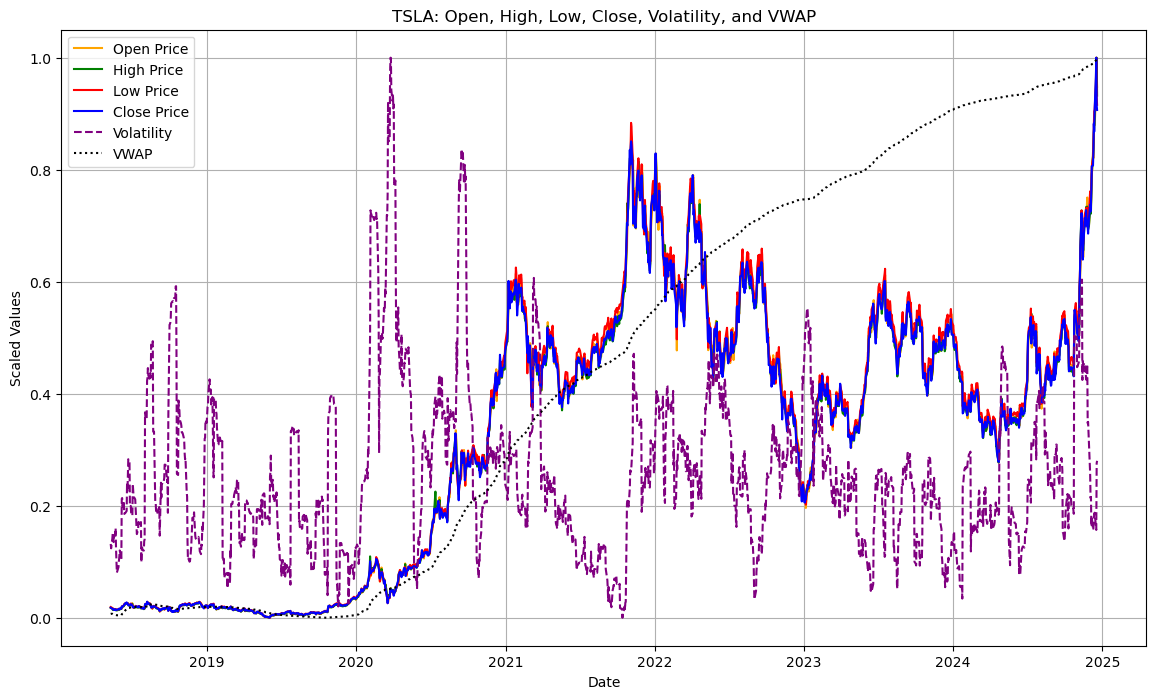

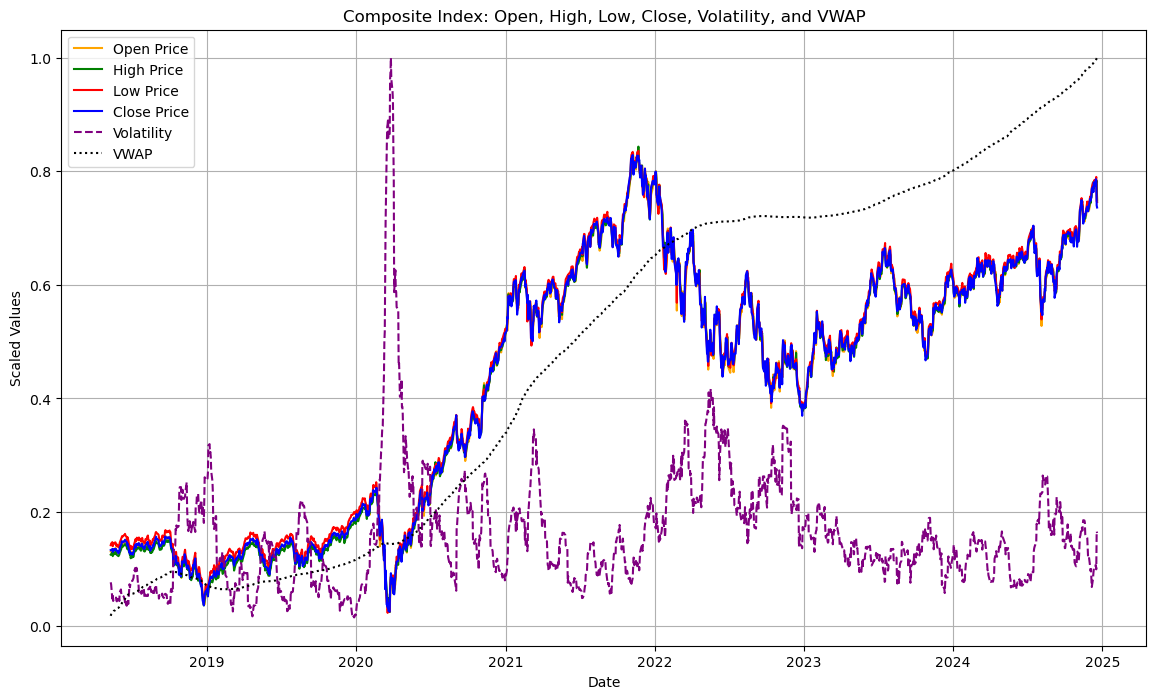

In [38]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize the RobustScaler for price and MinMaxScaler for volatility
open_price_scaler = MinMaxScaler()
high_price_scaler = MinMaxScaler()
low_price_scaler = MinMaxScaler()
close_price_scaler = MinMaxScaler()
vol_scaler = MinMaxScaler()
vwap_minMax_scaler = MinMaxScaler()

# Create a DataFrame to hold the close prices of all indices for scaling

open_prices = pd.DataFrame({
    'TSLA': tsla_data['Open'],
    'NDX': ndx_data['Open'],
    'DRIV': driv_data['Open'],
    'XLY': xly_data['Open'],
    'LIT': lit_data['Open']
})

high_prices = pd.DataFrame({
    'TSLA': tsla_data['High'],
    'NDX': ndx_data['High'],
    'DRIV': driv_data['High'],
    'XLY': xly_data['High'],
    'LIT': lit_data['High']
})

low_prices = pd.DataFrame({
    'TSLA': tsla_data['Low'],
    'NDX': ndx_data['Low'],
    'DRIV': driv_data['Low'],
    'XLY': xly_data['Low'],
    'LIT': lit_data['Low']
})

close_prices = pd.DataFrame({
    'TSLA': tsla_data['Close'],
    'NDX': ndx_data['Close'],
    'DRIV': driv_data['Close'],
    'XLY': xly_data['Close'],
    'LIT': lit_data['Close']
})

prices_and_volumes = pd.DataFrame({
    'TSLA_Close': tsla_data['Close'],
    'TSLA_Volume': tsla_data['Volume'],
    'NDX_Close': ndx_data['Close'],
    'NDX_Volume': ndx_data['Volume'],
    'DRIV_Close': driv_data['Close'],
    'DRIV_Volume': driv_data['Volume'],
    'XLY_Close': xly_data['Close'],
    'XLY_Volume': xly_data['Volume'],
    'LIT_Close': lit_data['Close'],
    'LIT_Volume': lit_data['Volume']
})

weights = {'NDX': 0.35, 'XLY': 0.20, 'DRIV': 0.25, 'LIT': 0.20}

# Apply the minmax scaler to OHLC
scaled_open_prices = pd.DataFrame(open_price_scaler.fit_transform(open_prices), columns=open_prices.columns, index=open_prices.index)
scaled_high_prices = pd.DataFrame(high_price_scaler.fit_transform(high_prices), columns=high_prices.columns, index=high_prices.index)
scaled_low_prices = pd.DataFrame(low_price_scaler.fit_transform(low_prices), columns=high_prices.columns, index=low_prices.index)
scaled_close_prices = pd.DataFrame(close_price_scaler.fit_transform(close_prices), columns=close_prices.columns, index=close_prices.index)

# Compute the composite open, high, and low prices
scaled_open_prices['Composite Open'] = (
    scaled_open_prices['NDX'] * weights['NDX'] +
    scaled_open_prices['XLY'] * weights['XLY'] +
    scaled_open_prices['DRIV'] * weights['DRIV'] +
    scaled_open_prices['LIT'] * weights['LIT']
)
scaled_high_prices['Composite High'] = (
    scaled_high_prices['NDX'] * weights['NDX'] +
    scaled_high_prices['XLY'] * weights['XLY'] +
    scaled_high_prices['DRIV'] * weights['DRIV'] +
    scaled_high_prices['LIT'] * weights['LIT']
)
scaled_low_prices['Composite Low'] = (
    scaled_low_prices['NDX'] * weights['NDX'] +
    scaled_low_prices['XLY'] * weights['XLY'] +
    scaled_low_prices['DRIV'] * weights['DRIV'] +
    scaled_low_prices['LIT'] * weights['LIT']
)

# Calculate logarithmic returns for each stock
log_returns = np.log(close_prices / close_prices.shift(1))

# Calculate rolling volatility using log returns for each index
window = 14
volatility_data = pd.DataFrame({
    'Volatility_TSLA': log_returns['TSLA'].rolling(window=window).std(),
    'Volatility_NDX': log_returns['NDX'].rolling(window=window).std(),
    'Volatility_DRIV': log_returns['DRIV'].rolling(window=window).std(),
    'Volatility_XLY': log_returns['XLY'].rolling(window=window).std(),
    'Volatility_LIT': log_returns['LIT'].rolling(window=window).std()
})

# Apply Min-Max scaling to volatilities
scaled_volatility = vol_scaler.fit_transform(volatility_data.dropna())
scaled_volatility_df = pd.DataFrame(scaled_volatility, columns=volatility_data.columns, index=volatility_data.dropna().index)
scaled_close_prices = scaled_close_prices.join(scaled_volatility_df)

# Compute the composite index
scaled_close_prices['Composite Index'] = (
    scaled_close_prices['NDX'] * weights['NDX'] +
    scaled_close_prices['XLY'] * weights['XLY'] +
    scaled_close_prices['DRIV'] * weights['DRIV'] +
    scaled_close_prices['LIT'] * weights['LIT']
)

# Compute the composite volatility weighted by the same weights used for the price index
scaled_close_prices['Composite_Volatility'] = (
    scaled_close_prices['Volatility_NDX'] * weights['NDX'] + 
    scaled_close_prices['Volatility_XLY'] * weights['XLY'] + 
    scaled_close_prices['Volatility_DRIV'] * weights['DRIV'] + 
    scaled_close_prices['Volatility_LIT'] * weights['LIT']
)

# Calculate VWAP for TSLA
prices_and_volumes['TSLA_VWAP'] = (prices_and_volumes['TSLA_Close'] * prices_and_volumes['TSLA_Volume']).cumsum() / prices_and_volumes['TSLA_Volume'].cumsum()

prices_and_volumes['Composite_Close'] = (
    prices_and_volumes['NDX_Close'] * weights['NDX'] +
    prices_and_volumes['XLY_Close'] * weights['XLY'] +
    prices_and_volumes['DRIV_Close'] * weights['DRIV'] +
    prices_and_volumes['LIT_Close'] * weights['LIT']
)
prices_and_volumes['Composite_Volume'] = (
    prices_and_volumes['NDX_Volume'] * weights['NDX'] +
    prices_and_volumes['XLY_Volume'] * weights['XLY'] +
    prices_and_volumes['DRIV_Volume'] * weights['DRIV'] +
    prices_and_volumes['LIT_Volume'] * weights['LIT']
)

# Calculate VWAP for the composite index
prices_and_volumes['Composite_VWAP'] = (prices_and_volumes['Composite_Close'] * prices_and_volumes['Composite_Volume']).cumsum() / prices_and_volumes['Composite_Volume'].cumsum()

vwap_data = prices_and_volumes[['TSLA_VWAP', 'Composite_VWAP']]
# Apply Min-Max scaling
scaled_vwap = vwap_minMax_scaler.fit_transform(vwap_data)
prices_and_volumes['Scaled_TSLA_VWAP'] = scaled_vwap[:, 0]
prices_and_volumes['Scaled_Composite_VWAP'] = scaled_vwap[:, 1]

final_data_tsla = pd.DataFrame({
    'Date': tsla_data.index,
    'Open_Price': scaled_open_prices['TSLA'], 
    'High_Price': scaled_high_prices['TSLA'],   
    'Low_Price': scaled_low_prices['TSLA'],      
    'Close_Price': scaled_close_prices['TSLA'],           
    'Volatility': scaled_volatility_df['Volatility_TSLA'],
    'VWAP': prices_and_volumes['Scaled_TSLA_VWAP']
})

final_data_composite = pd.DataFrame({
    'Date': tsla_data.index,
    'Open_Price': scaled_open_prices['Composite Open'], 
    'High_Price': scaled_high_prices['Composite High'],   
    'Low_Price': scaled_low_prices['Composite Low'],      
    'Close_Price': scaled_close_prices['Composite Index'],          
    'Volatility': scaled_close_prices['Composite_Volatility'],
    'VWAP': prices_and_volumes['Scaled_Composite_VWAP']
})

final_data_tsla.dropna(inplace=True)
final_data_composite.dropna(inplace=True)

print(final_data_tsla.isna().sum())
print(final_data_composite.isna().sum())

print("Shape of TSLA data:", final_data_tsla.shape)
print("Shape of Composite data:", final_data_composite.shape)

print("Date mismatches:", np.setdiff1d(final_data_tsla.index, final_data_composite.index))

print(final_data_tsla.describe())
print(final_data_composite.describe())

final_data_tsla.to_csv('TSLA_Normalised_OHLC_VWAP_VOL.csv')
final_data_composite.to_csv('NDXL_Normalised_OHLC_VWAP_VOL.csv')

plt.figure(figsize=(14, 8))
plt.plot(final_data_tsla['Date'], final_data_tsla['Open_Price'], label='Open Price', color='orange')
plt.plot(final_data_tsla['Date'], final_data_tsla['High_Price'], label='High Price', color='green')
plt.plot(final_data_tsla['Date'], final_data_tsla['Low_Price'], label='Low Price', color='red')
plt.plot(final_data_tsla['Date'], final_data_tsla['Close_Price'], label='Close Price', color='blue')
plt.plot(final_data_tsla['Date'], final_data_tsla['Volatility'], label='Volatility', color='purple', linestyle='--')
plt.plot(final_data_tsla['Date'], final_data_tsla['VWAP'], label='VWAP', color='black', linestyle=':')
plt.title('TSLA: Open, High, Low, Close, Volatility, and VWAP')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Composite Index
plt.figure(figsize=(14, 8))
plt.plot(final_data_composite['Date'], final_data_composite['Open_Price'], label='Open Price', color='orange')
plt.plot(final_data_composite['Date'], final_data_composite['High_Price'], label='High Price', color='green')
plt.plot(final_data_composite['Date'], final_data_composite['Low_Price'], label='Low Price', color='red')
plt.plot(final_data_composite['Date'], final_data_composite['Close_Price'], label='Close Price', color='blue')
plt.plot(final_data_composite['Date'], final_data_composite['Volatility'], label='Volatility', color='purple', linestyle='--')
plt.plot(final_data_composite['Date'], final_data_composite['VWAP'], label='VWAP', color='black', linestyle=':')
plt.title('Composite Index: Open, High, Low, Close, Volatility, and VWAP')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()
